In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def mel_scale(f0):
    """メル尺度"""
    
    m0 = 1000.0 / np.log10(1000.0 / f0 + 1.0)

    def mel_scaled(f):
        return m0 * np.log10(f / f0 + 1.0)

    return mel_scaled

def imel_scale(f0):
    """メル尺度の逆関数"""
    
    m0 = 1000.0 / np.log10(1000.0 / f0 + 1.0)
    
    def imel_scaled(m):
        return f0 * (10 ** (m / m0) - 1)
    
    return imel_scaled

In [3]:
def mel_check(hz):
    mel = mel_scale(700)(hz)
    x = imel_scale(700)(mel)
    print(hz, "to mel =>", mel)
    print(mel, "to hz =>", x)

In [4]:
mel_check(20000)

20000 to mel => 3816.9688369110513
3816.9688369110513 to hz => 20000.0


In [5]:
def plot_mel(f0):
    mel_scaled = mel_scale(f0)
    xs = np.arange(20000)
    mel_xs = np.vectorize(mel_scaled)(xs)
    plt.plot(xs, mel_xs)

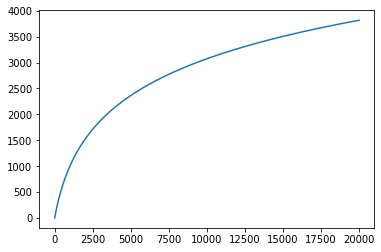

In [6]:
plot_mel(700)

In [7]:
def tri_window(n, l, m, r):
    edge = int((r - l + 1) // 2)
    
    a = np.zeros(int(l))
    b = np.linspace(0, 1, edge)
    c = np.linspace(0, 1, edge)[::-1]
    
    f = np.concatenate([a, b, c])
    return np.append(f, np.zeros(n - len(f)))
        

def mel_filter_bank(f, n_bins, mel_param=700):
    mel_scaled = mel_scale(mel_param)
    imel_scaled = imel_scale(mel_param)

    mel_end = mel_scaled(f)

    mel_first, *mel_tail = np.array_split(np.arange(int(mel_end)), n_bins+1)
    
    hz_r = [imel_scaled(b[-1])
             for b
             in mel_tail]
    
    hz_m = [imel_scaled(mel_first[-1])] + hz_r[:-1]
    
    hz_l = [0] + hz_m[:-1]
    
    return np.array([tri_window(f, l, m, r) 
                      for l, m, r 
                      in zip(hz_l, hz_m, hz_r)])
    

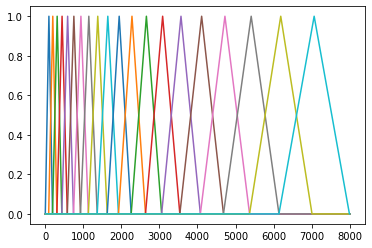

In [8]:
for f in mel_filter_bank(8000, 20):
    plt.plot(f)